In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

# Obtain Data

In [44]:
data = pd.read_csv('1.0-sm-business_cleaned-1_new.csv')

In [45]:
data

,stars,business_id,name,city,state,postal_code,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments
0,4.0,MTSW4McQd7CbVtyjqoe9mw,st honore pastries,philadelphia,PA,19107,39.955505,-75.155564,"restaurants, food, bubble tea, coffee & tea, b...",1.903090,NaN,NaN,NaN,NaN
1,4.5,mWMc6_wTdE0EUBKIGXDVfA,perkiomen valley brewery,green lane,PA,18054,40.338183,-75.471659,"brewpubs, breweries, food",1.113943,NaN,NaN,NaN,NaN
2,2.0,CF33F8-E6oudUQ46HnavjQ,sonic drive-in,ashland city,TN,37015,36.269593,-87.058943,"burgers, fast food, sandwiches, food, ice crea...",0.778151,NaN,NaN,NaN,NaN
3,1.5,bBDDEgkFA1Otx9Lfe7BZUQ,sonic drive-in,nashville,TN,37207,36.208102,-86.768170,"ice cream & frozen yogurt, fast food, burgers,...",1.000000,NaN,NaN,NaN,NaN
4,2.5,il_Ro8jwPlHresjw9EGmBg,denny's,indianapolis,IN,46227,39.637133,-86.127217,"american (traditional), restaurants, diners, b...",1.447158,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39043,4.5,w_4xUt-1AyY2ZwKtnjW0Xg,bittercreek alehouse,boise,ID,83702,43.616590,-116.202383,"bars, gastropubs, sandwiches, nightlife, resta...",2.999131,NaN,NaN,NaN,NaN
39044,3.0,l9eLGG9ZKpLJzboZq-9LRQ,wawa,clifton heights,PA,19018,39.925656,-75.310344,"restaurants, sandwiches, convenience stores, c...",1.041393,NaN,NaN,NaN,NaN
39045,4.0,cM6V90ExQD6KMSU3rRB5ZA,dutch bros coffee,boise,ID,83704,43.615401,-116.284689,"cafes, juice bars & smoothies, coffee & tea, r...",1.518514,NaN,NaN,NaN,NaN
39046,4.5,1jx1sfgjgVg0nM6n3p0xWA,savaya coffee market,oro valley,AZ,85737,32.409552,-110.943073,"specialty food, food, coffee & tea, coffee roa...",1.612784,NaN,NaN,NaN,NaN


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39048 entries, 0 to 39047
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   stars                      39048 non-null  float64
 1   business_id                39048 non-null  object 
 2   name                       39048 non-null  object 
 3   city                       39048 non-null  object 
 4   state                      39048 non-null  object 
 5   postal_code                39048 non-null  object 
 6   latitude                   39048 non-null  float64
 7   longitude                  39048 non-null  float64
 8   categories                 39048 non-null  object 
 9   review_count               39048 non-null  float64
 10  mean_user_review_counts    0 non-null      float64
 11  mean_months_since_yelping  0 non-null      float64
 12  mean_user_fans             0 non-null      float64
 13  mean_total_compliments     0 non-null      flo

In [47]:
#the cusines are randomly picked and used for analysis
cuisines = ['mexican', 'american', 'italian', 'indian', 
            'chinese', 'mediterranean', 'pizza', 'bar', 'french']

In [48]:
def fetch_cusines(x):
    for cuisine in cuisines:
        if cuisine in x:
            return cuisine
    else:
        return None

In [49]:
data['cuisine'] = data.categories.apply(lambda x: fetch_cusines(x))

In [50]:
data.head(10)

,stars,business_id,name,city,state,postal_code,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments,cuisine
0,4.0,MTSW4McQd7CbVtyjqoe9mw,st honore pastries,philadelphia,PA,19107,39.955505,-75.155564,"restaurants, food, bubble tea, coffee & tea, b...",1.903090,NaN,NaN,NaN,NaN,None
1,4.5,mWMc6_wTdE0EUBKIGXDVfA,perkiomen valley brewery,green lane,PA,18054,40.338183,-75.471659,"brewpubs, breweries, food",1.113943,NaN,NaN,NaN,NaN,None
2,2.0,CF33F8-E6oudUQ46HnavjQ,sonic drive-in,ashland city,TN,37015,36.269593,-87.058943,"burgers, fast food, sandwiches, food, ice crea...",0.778151,NaN,NaN,NaN,NaN,None
3,1.5,bBDDEgkFA1Otx9Lfe7BZUQ,sonic drive-in,nashville,TN,37207,36.208102,-86.768170,"ice cream & frozen yogurt, fast food, burgers,...",1.000000,NaN,NaN,NaN,NaN,None
4,2.5,il_Ro8jwPlHresjw9EGmBg,denny's,indianapolis,IN,46227,39.637133,-86.127217,"american (traditional), restaurants, diners, b...",1.447158,NaN,NaN,NaN,NaN,american
5,4.0,MUTTqe8uqyMdBl186RmNeA,tuna bar,philadelphia,PA,19106,39.953949,-75.143226,"sushi bars, restaurants, japanese",2.389166,NaN,NaN,NaN,NaN,bar
6,4.5,ROeacJQwBeh05Rqg7F6TCg,bap,philadelphia,PA,19147,39.943223,-75.162568,"korean, restaurants",2.311754,NaN,NaN,NaN,NaN,None
7,4.0,kfNv-JZpuN6TVNSO6hHdkw,hibachi express,indianapolis,IN,46250,39.904320,-86.053080,"steakhouses, asian fusion, restaurants",1.301030,NaN,NaN,NaN,NaN,None
8,2.5,9OG5YkX1g2GReZM0AskizA,romano's macaroni grill,reno,NV,89502,39.476117,-119.789339,"restaurants, italian",2.530200,NaN,NaN,NaN,NaN,italian
9,3.5,sqSqqLy0sN8n2IZrAbzidQ,domino's pizza,white house,TN,37188,36.464747,-86.659187,"pizza, chicken wings, sandwiches, restaurants",0.903090,NaN,NaN,NaN,NaN,pizza


In [51]:
cuisine_data = data[pd.notnull(data.cuisine)]

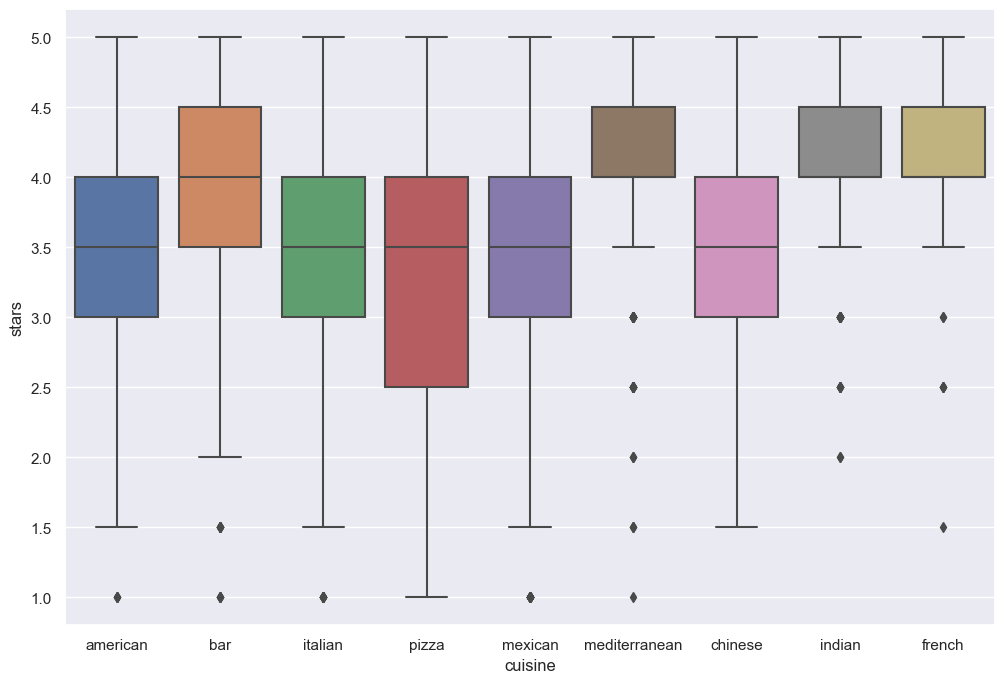

In [52]:
sns.set(rc={'figure.figsize':(12,8)})
sns_plot = sns.boxplot(x="cuisine", y="stars", data=cuisine_data)
sns_plot.figure.savefig('box-plot-cusine-and-stars.png')

In [53]:
postal_code_data = data[data.postal_code != 'not_available']

In [54]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.quantile(0.75)

In [55]:
postal_code_stats = postal_code_data.groupby('postal_code')['stars'].agg(['min', q1, 'median', 'mean', q2, 'max', 'count']).reset_index()

In [29]:
postal_code_stats.head()

,postal_code,min,q1,median,mean,q2,max,count
0,08001,3.5,3.625,3.75,3.750000,3.875,4.0,2
1,08002,1.5,3.000,3.50,3.344262,4.000,5.0,122
2,08003,1.5,3.500,4.00,3.726415,4.500,5.0,53
3,08004,1.5,3.000,4.00,3.545455,4.250,5.0,11
4,08007,3.0,3.750,4.00,4.000000,4.250,5.0,11


In [30]:
postal_code_stats.nlargest(100, 'count').nlargest(5,'median').nlargest(5,'mean')

,postal_code,min,q1,median,mean,q2,max,count
815,93101,1.5,4.0,4.0,4.090909,4.5,5.0,352
237,19147,1.5,3.5,4.0,3.960177,4.5,5.0,339
201,19107,1.5,3.5,4.0,3.739659,4.0,5.0,411
726,70130,1.0,3.5,4.0,3.720320,4.5,5.0,438
493,37203,1.5,3.5,4.0,3.688830,4.0,5.0,376


In [31]:
postal_code_data[
    postal_code_data.postal_code.isin(
        postal_code_stats.nlargest(100, 'count').nlargest(5,'median').nlargest(5,'mean').postal_code
    )].groupby(['postal_code','city','state']).size().reset_index()

,postal_code,city,state,0
0,19107,philadelphia,PA,411
1,19147,philadelphia,PA,339
2,37203,nashville,TN,376
3,70130,new orleans,LA,438
4,93101,santa barbara,CA,352


In [32]:
cuisine_data.head()

,stars,business_id,name,city,state,postal_code,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments,cuisine
4,2.5,il_Ro8jwPlHresjw9EGmBg,denny's,indianapolis,IN,46227,39.637133,-86.127217,"american (traditional), restaurants, diners, b...",1.447158,NaN,NaN,NaN,NaN,american
5,4.0,MUTTqe8uqyMdBl186RmNeA,tuna bar,philadelphia,PA,19106,39.953949,-75.143226,"sushi bars, restaurants, japanese",2.389166,NaN,NaN,NaN,NaN,bar
8,2.5,9OG5YkX1g2GReZM0AskizA,romano's macaroni grill,reno,NV,89502,39.476117,-119.789339,"restaurants, italian",2.530200,NaN,NaN,NaN,NaN,italian
9,3.5,sqSqqLy0sN8n2IZrAbzidQ,domino's pizza,white house,TN,37188,36.464747,-86.659187,"pizza, chicken wings, sandwiches, restaurants",0.903090,NaN,NaN,NaN,NaN,pizza
10,3.5,kV_Q1oqis8Qli8dUoGpTyQ,ardmore pizza,ardmore,PA,19003,40.006707,-75.289671,"pizza, restaurants",2.037426,NaN,NaN,NaN,NaN,pizza


In [40]:
cuisine_postal_data = cuisine_data[cuisine_data.postal_code.isin(
    postal_code_stats.nlargest(100, 'count').nlargest(5,'median').nlargest(5,'mean').postal_code)]

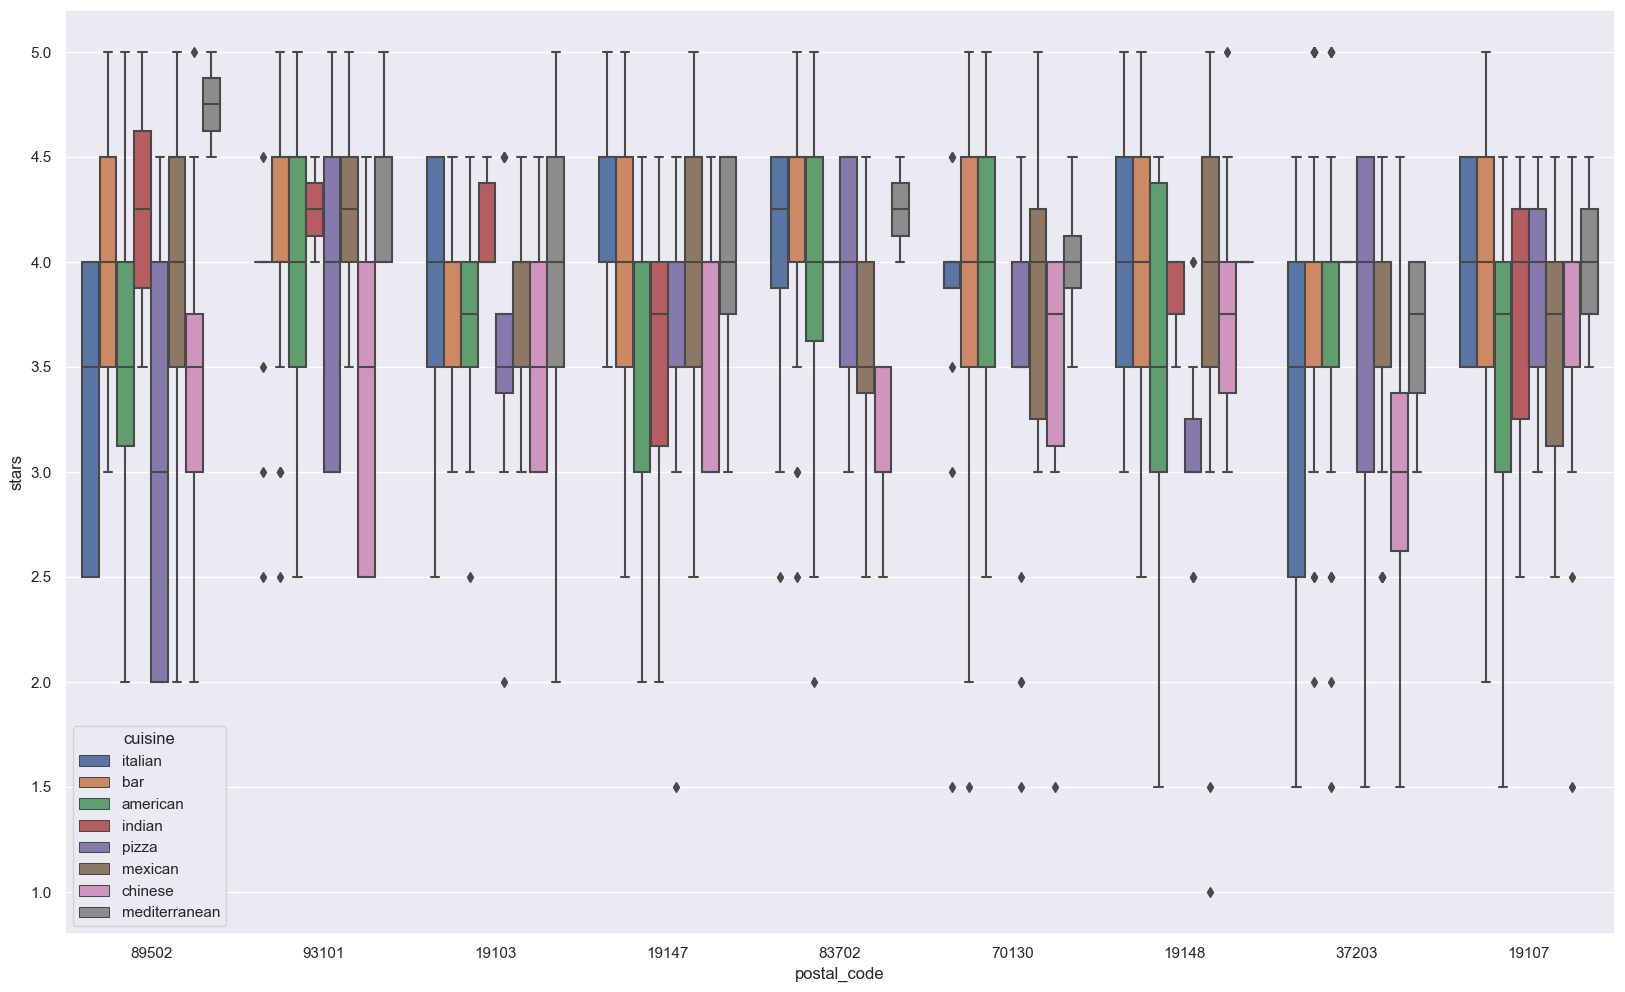

In [39]:
sns.set(rc={'figure.figsize':(20,12)})
sns_plot = sns.boxplot(x="postal_code", y="stars", hue="cuisine", data=cuisine_postal_data)
sns_plot.figure.savefig('box-plot-stars-zip-cusine.png')